### **Decision Tree (For Classification and Regression)**

**`Goal:`** Build a tree-like model of decision based on features to predict a target value.

**Mathematical Idea:**

* It recursively splits the data based on features that provides the "best" separation or reduction in impurity.

* For **classification**, impurity is often measured by **Gini Impurity** or **Entropy** .The goal is to maximize information gain (reduction impurity).

* For **regression**, impurity is often measured by **Mean Squared Error (MSE)** or **Mean Absolute Error (MAE)**.The goal is to minimize the variance within the split nodes. 

**How it works (simplified for classification):**

1. start with all data at the root node.

2. For each feature, consider all posible split points.

3. Calculate the gini inpurity (or Entropy) for each pontential split.

4. Choose the split that results in the lowest weighted average impurity of the child nodes (highest information).

5. Recursivley apply steps 2-4 to the child nodes until a stopping criterionis met (e.g. maximimum depth, minimum samples per leaf, no further impurity reduction).

**Decision Tree with `scikit-learn`** (Classification)

This is highly recommended due to the complexity of the algorithm.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 1. Genearate Sample data (for classification)
np.random.seed(0)
# Class 0 data
X0 = np.random.multivariate_normal(mean=[0,0], cov=[[1, 0.5], [0.5, 1]], size=50)
y0 = np.zeros(50)
# Class 1 data
X1 = np.random.multivariate_normal(mean=[3,3], cov=[[1, 0.5], [0.5, 1]], size=50)
y1 = np.ones(50)

X = np.vstack((X0, X1))
y = np.hstack((y0, y1))

print(X[:5])
print()
print(y[:5])

[[-1.72779275 -1.32763554]
 [-1.96805856  0.27283464]
 [-1.12871372 -2.1059916 ]
 [-0.7471221  -0.89847931]
 [-0.1159091   0.2946894 ]]

[0. 0. 0. 0. 0.]


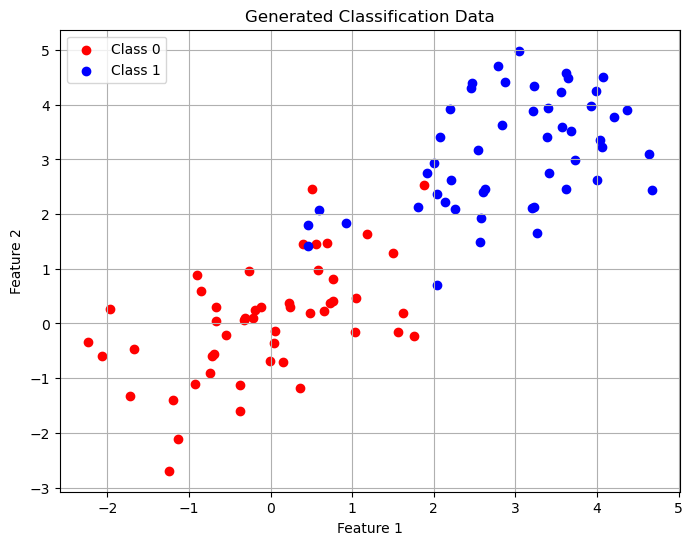

In [3]:
# visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X[y== 0, 0], X[y==0, 1], color='red', label='Class 0')
plt.scatter(X[y== 1, 0], X[y==1, 1], color='blue', label='Class 1')
plt.title('Generated Classification Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# No scaling is typically needed for Decision Trees as they are not sensitive to feature scales
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Instantiate and train the Decision Tree Classifier
# max_depth: limits the depth of the tree to prevent overfitting
# random_state: for reproducibility
model_dt_sklearn = DecisionTreeClassifier(max_depth=3, random_state=42)
model_dt_sklearn.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [6]:
# Make predictions on the test set
y_pred_dt_sklearn = model_dt_sklearn.predict(X_test)

In [7]:
# Evaluate the model
accuracy_dt_sklearn = accuracy_score(y_test, y_pred_dt_sklearn)
print(f"\nScikit-learn Decision Tree Classifier Accuracy: {accuracy_dt_sklearn:.2f}")
print(f"\nScikit-learn Decision Tree Classifier Confusion Matrix:\n{confusion_matrix(y_test, y_pred_dt_sklearn)}")
print(f"\nScikit-learn Decision Tree Classifier Classification Report:\n{classification_report(y_test, y_pred_dt_sklearn)}")


Scikit-learn Decision Tree Classifier Accuracy: 0.90

Scikit-learn Decision Tree Classifier Confusion Matrix:
[[10  2]
 [ 0  8]]

Scikit-learn Decision Tree Classifier Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.83      0.91        12
         1.0       0.80      1.00      0.89         8

    accuracy                           0.90        20
   macro avg       0.90      0.92      0.90        20
weighted avg       0.92      0.90      0.90        20



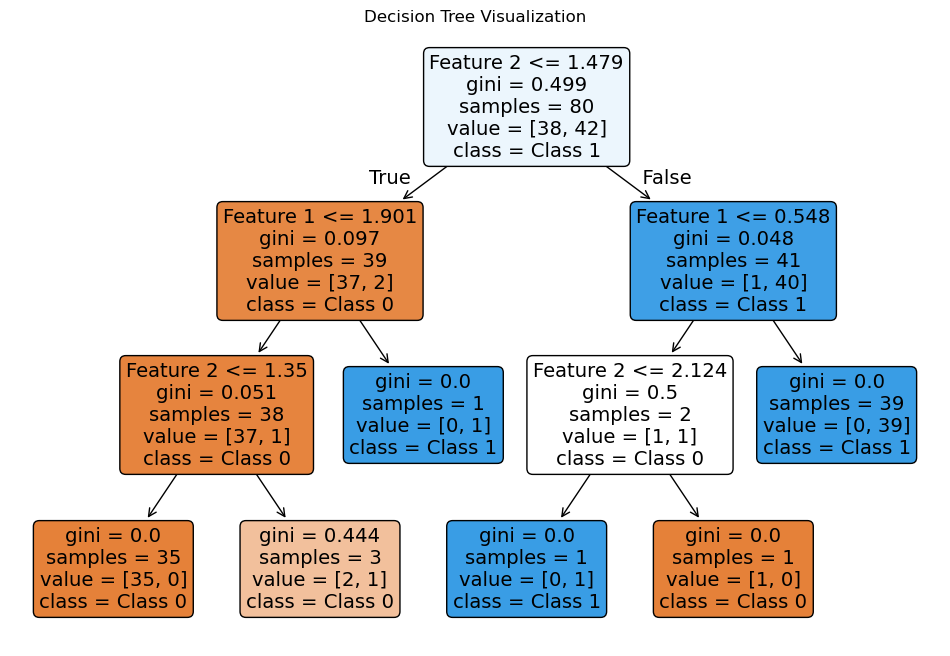

In [9]:
# Visualize the decision tree (requires matplotlib)
plt.figure(figsize=(12, 8))
plot_tree(model_dt_sklearn, filled=True, 
          feature_names=['Feature 1', 'Feature 2'],
          class_names=['Class 0', 'Class 1'],
          rounded=True)
plt.title('Decision Tree Visualization')
plt.show()